In [1]:
import sys 
sys.path.append('/Users/willknott/Desktop/DIS/coursework/pds/wdk24/src')
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from generation import generate_from_total_pdf
from distributions import total_cdf, total_pdf
from hypothesis_test import signal_background_test
from generation import generate_from_total_pdf
from distributions import total_cdf, total_pdf
from hypothesis_test import signal_background_test
from generation import generate_from_total_pdf
from distributions import total_cdf, total_pdf
from hypothesis_test import signal_background_test

In [7]:
true_params = {'f': 0.1, 'lam': 0.5, 'mu': 5.28, 'sigma': 0.018}

N_events = 10000
dataset = generate_from_total_pdf(N_events)

(bin_density, midpoints, h0_params, h1_params), discovery, Z, p_value = signal_background_test(
                                                                            dataset, 
                                                                            pdf=total_pdf,
                                                                            cdf=total_cdf, 
                                                                            binned=True,
                                                                            starting_params=true_params, 
                                                                            print_fitting_results=True, 
                                                                            return_variables_for_plotting=True
                                                                            )

print(discovery, Z, p_value)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.206 (chi2/ndof = 0.0)    │              Nfcn = 92               │
│ EDM = 7.9e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

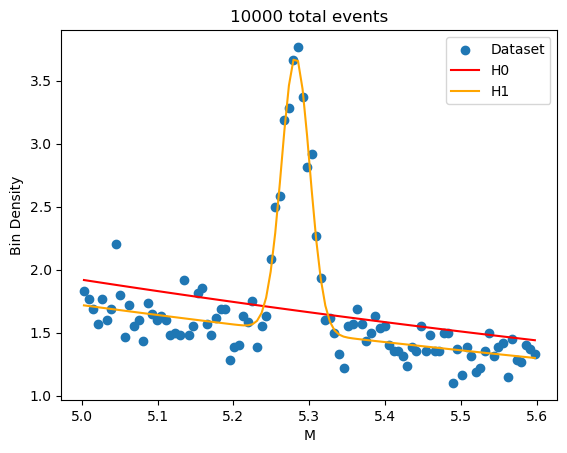

In [8]:
fig, ax = plt.subplots()

# Plotting bin count vs midpoints
ax.scatter(midpoints, bin_density, label='Dataset', marker='o')
# ax.plot(midpoints, total_model(midpoints, **true_params), label='True model', color='red')
ax.plot(midpoints, total_pdf(midpoints, *h0_params), label='H0', color='red')
ax.plot(midpoints, total_pdf(midpoints, *h1_params), label='H1', color='orange')

ax.set_xlabel('M')
ax.set_ylabel('Bin Density')
ax.set_title(f'{N_events} total events')

ax.legend()

In [25]:
print(discovery, Z, p_value)

False 2.6104385992367565 0.0045213101625717345


In [4]:
import numpy as np
# True parameter values
true_params, alpha, beta = {'f': 0.1, 'lam': 0.5, 'mu': 5.28, 'sigma': 0.018}, 5, 5.6
random_shifts = {
    'f': np.random.uniform(-0.09, 0.5), 
    'lam': np.random.uniform(-0.3, 1), 
    'mu': np.random.uniform(-0.25, 0.3), 
    'sigma': np.random.uniform(-0.01, 0.03)
}
starting_params = {}
for param in true_params:
    starting_params[param] = true_params[param] + random_shifts[param]
    starting_params[param] = float(f'{starting_params[param]:.4}')

In [11]:
from generation import generate_from_total_pdf

N_events = 700
dataset = generate_from_total_pdf(N_events)